In [52]:
#price and location


import warnings


import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
warnings.simplefilter(action="ignore", category=FutureWarning)


In [58]:
def wrangle(filepath):
    df=pd.read_excel(filepath)
    

    #df = wrangle(r"C:\Users\User\anaconda3\Lib\site-packages\sklearn\datasets\data\mexico folder\housing-in-buenos-aires1.xlsx")
    # Subset data: Apartments in "Capital Federal", less than 400,000
    mask_ba= df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt= df["property_type"]=="apartment"
    mask_price=df["price_aprox_usd"]<400_000
    df=df[mask_ba & mask_apt & mask_price]
    
    
     # Subset data: Remove outliers for "surface_covered_in_m2"
    low,high=df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area=df["surface_covered_in_m2"].between(low,high)
    df=df[mask_area]  
    
   # Add to the wrangle function below so that, in the DataFrame it returns, the "lat-lon" column is replaced by separate "lat" and "lon" columns. 
    #Don't forget to also drop the "lat-lon" column. Be sure to rerun all the cells above before you continue.
    
    df[["lat","lon"]]= df["lat-lon"].str.split(",", expand=True).astype(float)
    df.drop(columns="lat-lon", inplace=True)
    #df.drop(columns="z",inplace=True)
    #df.drop(columns="Unnamed: 0",inplace=True)
    df.head()
    
    return df

In [56]:
frame1 =wrangle(r"C:\Users\User\anaconda3\Lib\site-packages\sklearn\datasets\data\mexico folder\housing-in-buenos-aires1.xlsx")
frame1.info()
frame1.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 4 to 8604
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1343 non-null   object 
 1   property_type               1343 non-null   object 
 2   place_with_parent_names     1343 non-null   object 
 3   price                       1343 non-null   float64
 4   currency                    1343 non-null   object 
 5   price_aprox_local_currency  1343 non-null   float64
 6   price_aprox_usd             1343 non-null   float64
 7   surface_total_in_m2         965 non-null    float64
 8   surface_covered_in_m2       1343 non-null   float64
 9   price_usd_per_m2            927 non-null    float64
 10  price_per_m2                1343 non-null   float64
 11  floor                       379 non-null    float64
 12  rooms                       1078 non-null   float64
 13  expenses                    349 n

operation property_type                        place_with_parent_names  \
4        sell     apartment          |Argentina|Capital Federal|Chacarita|   
9        sell     apartment         |Argentina|Capital Federal|Villa Luro|   
29       sell     apartment          |Argentina|Capital Federal|Caballito|   
40       sell     apartment       |Argentina|Capital Federal|Constitución|   
41       sell     apartment               |Argentina|Capital Federal|Once|   
48       sell     apartment            |Argentina|Capital Federal|Almagro|   
58       sell     apartment            |Argentina|Capital Federal|Palermo|   
62       sell     apartment             |Argentina|Capital Federal|Flores|   
70       sell     apartment           |Argentina|Capital Federal|Belgrano|   
72       sell     apartment            |Argentina|Capital Federal|Liniers|   
79       sell     apartment       |Argentina|Capital Federal|Villa Crespo|   
88       sell     apartment       |Argentina|Capital Federal|Villa Crespo|   
104      sell     apartment      |Argentina|Capital Federal|San Cristobal|   
131      sell     apartment            |Argentina|Capital Federal|Almagro|   
140      sell     apartment           |Argentina|Capital Federal|Congreso|   
142      sell     apartment           |Argentina|Capital Federal|Saavedra|   
149      sell     apartment          |Argentina|Capital Federal|Balvanera|   
170      sell     apartment       |Argentina|Capital Federal|Villa Crespo|   
176      sell     apartment           |Argentina|Capital Federal|Belgrano|   
178      sell     apartment  |Argentina|Capital Federal|Parque Avellaneda|   

        price currency  price_aprox_local_currency  price_aprox_usd  \
4    129000.0      USD                   1955949.6         129000.0   
9     87000.0      USD                   1319128.8          87000.0   
29   118000.0      USD                   1789163.2         118000.0   
40    57000.0      USD                    864256.8          57000.0   
41    90000.0      USD                   1364616.0          90000.0   
48   138000.0      USD                   2092411.2         138000.0   
58   114000.0      USD                   1728513.6         114000.0   
62    82000.0      USD                   1243316.8          82000.0   
70   166000.0      USD                   2516958.4         166000.0   
72   136500.0      USD                   2069667.6         136500.0   
79    75000.0      USD                   1137180.0          75000.0   
88    68000.0      USD                   1031043.2          68000.0   
104   80000.0      USD                   1212992.0          80000.0   
131  125000.0      USD                   1895300.0         125000.0   
140  120000.0      USD                   1819488.0         120000.0   
142  145000.0      USD                   2198548.0         145000.0   
149   95000.0      USD                   1440428.0          95000.0   
170  155000.0      USD                   2350172.0         155000.0   
176  300000.0      USD                   4548720.0         300000.0   
178   95000.0      USD                   1440428.0          95000.0   

     surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
4                   76.0                   70.0       1697.368421   
9                   48.0                   42.0       1812.500000   
29                   NaN                   54.0               NaN   
40                  42.0                   42.0       1357.142857   
41                  57.0                   50.0       1578.947368   
48                  74.0                   74.0       1864.864865   
58                   NaN                   32.0               NaN   
62                  50.0                   50.0       1640.000000   
70                  58.0                   52.0       2862.068966   
72                   NaN                   71.0               NaN   
79                  40.0                   36.0       1875.000000   
88                   NaN                   37

In [59]:
frame2 = wrangle(r"C:\Users\User\anaconda3\Lib\site-packages\sklearn\datasets\data\mexico folder\housing-in-buenos-aires2.xlsx")

In [60]:
frame2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 2 to 8585
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1315 non-null   int64  
 1   operation                   1315 non-null   object 
 2   property_type               1315 non-null   object 
 3   place_with_parent_names     1315 non-null   object 
 4   price                       1315 non-null   float64
 5   currency                    1315 non-null   object 
 6   price_aprox_local_currency  1315 non-null   float64
 7   price_aprox_usd             1315 non-null   float64
 8   surface_total_in_m2         933 non-null    float64
 9   surface_covered_in_m2       1315 non-null   float64
 10  price_usd_per_m2            891 non-null    float64
 11  price_per_m2                1315 non-null   float64
 12  floor                       390 non-null    float64
 13  rooms                       1059 

In [11]:
#in the last lesson, we built a simple linear model that predicted apartment price based on one feature, "surface_covered_in_m2". 
#In this lesson, we're building a multiple linear regression model that predicts price based on two features, "lon" and "lat". 
#This means that our data visualizations now have to communicate three pieces of information: Longitude, latitude, and price. 
#How can we represent these three attributes on a two-dimensional screen?

#One option is to incorporate color into our scatter plot. For example, in the Mapbox scatter plot below,
#the location of each point represents latitude and longitude, and color represents price.

In [61]:
#Use pd.concat to concatenate frame1 and frame2 into a new DataFrame df. 
#Make sure you set the ignore_index argument to True.

df = pd.concat([frame1,frame2], ignore_index=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   2658 non-null   object 
 1   property_type               2658 non-null   object 
 2   place_with_parent_names     2658 non-null   object 
 3   price                       2658 non-null   float64
 4   currency                    2658 non-null   object 
 5   price_aprox_local_currency  2658 non-null   float64
 6   price_aprox_usd             2658 non-null   float64
 7   surface_total_in_m2         1898 non-null   float64
 8   surface_covered_in_m2       2658 non-null   float64
 9   price_usd_per_m2            1818 non-null   float64
 10  price_per_m2                2658 non-null   float64
 11  floor                       769 non-null    float64
 12  rooms                       2137 non-null   float64
 13  expenses                    688 n

operation property_type                   place_with_parent_names     price  \
0      sell     apartment     |Argentina|Capital Federal|Chacarita|  129000.0   
1      sell     apartment    |Argentina|Capital Federal|Villa Luro|   87000.0   
2      sell     apartment     |Argentina|Capital Federal|Caballito|  118000.0   
3      sell     apartment  |Argentina|Capital Federal|Constitución|   57000.0   
4      sell     apartment          |Argentina|Capital Federal|Once|   90000.0   

  currency  price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0      USD                   1955949.6         129000.0                 76.0   
1      USD                   1319128.8          87000.0                 48.0   
2      USD                   1789163.2         118000.0                  NaN   
3      USD                    864256.8          57000.0                 42.0   
4      USD                   1364616.0          90000.0                 57.0   

   surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                   70.0       1697.368421   1842.857143    NaN    NaN   
1                   42.0       1812.500000   2071.428571    NaN    NaN   
2                   54.0               NaN   2185.185185    NaN    2.0   
3                   42.0       1357.142857   1357.142857    5.0    2.0   
4                   50.0       1578.947368   1800.000000    NaN    3.0   

   expenses                                      properati_url        lat  \
0       NaN  http://chacarita.properati.com.ar/10qlv_venta_... -34.584651   
1       NaN  http://villa-luro.properati.com.ar/12m82_venta... -34.638979   
2       NaN  http://caballito.properati.com.ar/11wqh_venta_... -34.615847   
3     364.0  http://constitucion.properati.com.ar/k2f0_vent... -34.625222   
4     450.0  http://once.properati.com.ar/suwa_venta_depart... -34.610610   

         lon  Unnamed: 0  
0 -58.454693         NaN  
1 -58.500115         NaN  
2 -58.459957         NaN  
3 -58.382382         NaN  
4 -58.412511         NaN

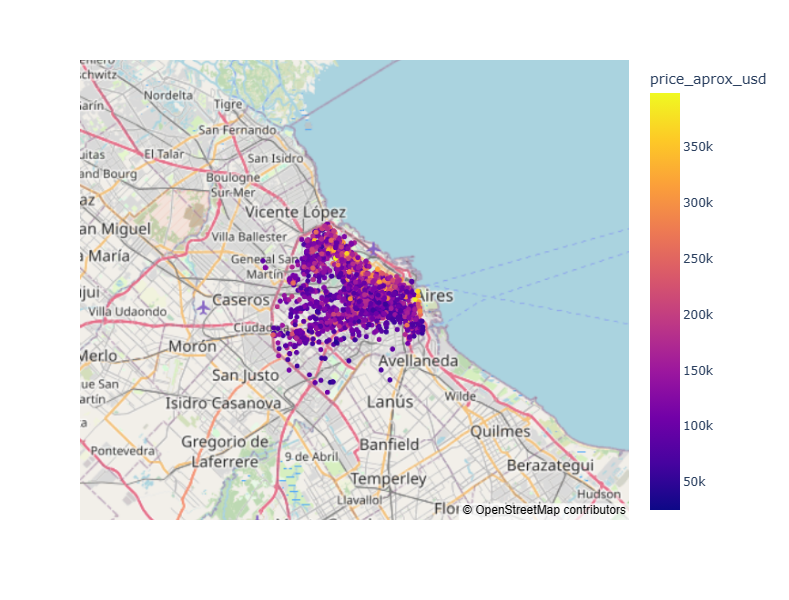

In [62]:
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    width=600,  # Width of map
    height=600,  # Height of map
    color="price_aprox_usd",
    hover_data=["price_aprox_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [63]:
#Another option is to add a third dimension to our scatter plot.
#We can plot longitude on the x-axis and latitude on the y-axis (like we do in the map above), 
#and then add a z-axis with price.

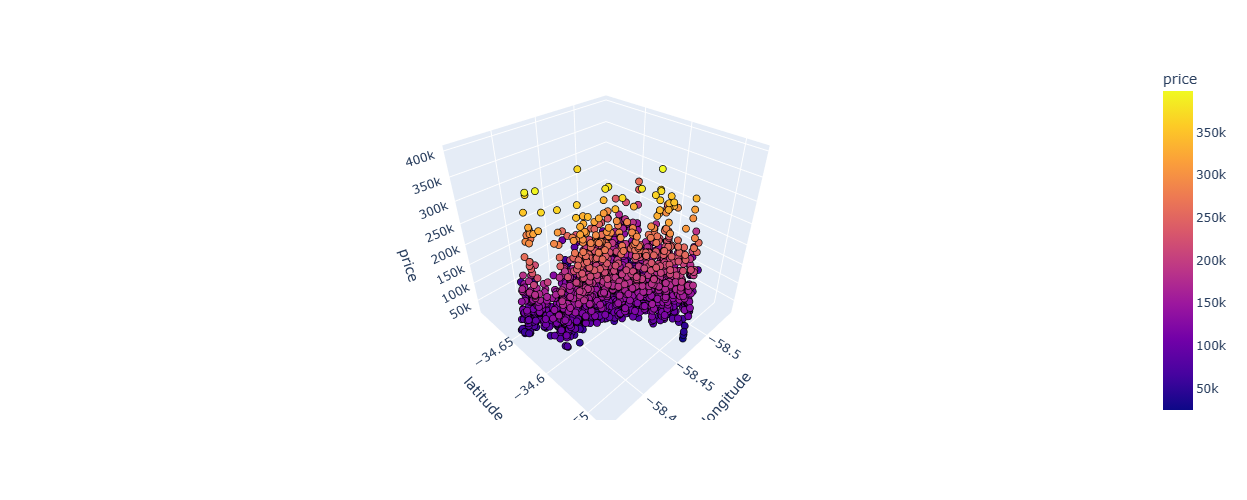

In [64]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="lon",
    y="lat",
    color="price_aprox_usd",
    z="price_aprox_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [ ]:
##Tip: 3D visualizations are often harder for someone to interpret than 2D visualizations. We're using one here because it will help us visualize our model once it's built, 

#but as a rule, it's better to stick with 2D when your communicating with an audience.
#In the last lesson, we represented our simple model as a line imposed on a 2D scatter plot.

In [65]:
#let build model now.
#let start with build

features = ["lon", "lat"]
X_train = df[features]
X_train.shape

(2658, 2)

In [66]:
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(2658,)

In [70]:
#Baseline
#Again, we need to set a baseline so we can evaluate our model's performance. You'll notice that the value of y_mean is not exactly the same as it was in the previous lesson. 
#That's because we've added more observations to our training data.

In [72]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[134732.97340481562,
 134732.97340481562,
 134732.97340481562,
 134732.97340481562,
 134732.97340481562]

In [73]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 134732.97
Baseline MAE: 45422.75


In [74]:
#take a moment to scroll up to the output for df.info() and look at the values in the "Non-Null Count" column.
#Because of the math it uses, a linear regression model can't handle observations where there are missing values. Do you see any columns where this will be a problem?

#In the last project, we simply dropped rows that contained NaN values, 
#but this isn't ideal. Models generally perform better when they have more data to train with, 
#so every row is precious. Instead, we can fill in these missing values using information we get from the whole column — a process called imputation.
#There are many different strategies for imputing missing values, and one of the most common is filling in the missing values with the mean of the column.

#In addition to predictors like LinearRegression, scikit-learn also has transformers that help us deal with issues like missing values. 
#Let's see how one works, and then we'll add it to our model.

In [75]:
imputer= SimpleImputer()

In [76]:
#Just like a predictor, a transformer has a fit method. 
#In the case of our SimpleImputer, this is the step where it calculates the mean values for each numerical column

In [77]:
imputer.fit(X_train)

SimpleImputer()

In [78]:
#Here's where transformers diverge from predictors. Instead of using a method like predict, 
#we use the transform method. This is the step where the transformer fills in the missing values with the means it's calculated.

In [79]:
XT_train =imputer.transform(X_train)
pd.DataFrame(XT_train, columns=X_train.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     2658 non-null   float64
 1   lat     2658 non-null   float64
dtypes: float64(2)
memory usage: 41.7 KB


In [80]:
#create a pipeline named model that contains a SimpleImputer transformer followed by a LinearRegression predictor.


In [81]:
model = make_pipeline(
      SimpleImputer(),
      LinearRegression()
     
)

In [82]:
#With our pipeline assembled, 
#we use the fit method, which will train the transformer, transform the data, then pass the transformed data to the predictor for training, all in one step. 
#Much easier!

In [83]:
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [84]:
#Evaluate
#As always, we'll start by evaluating our model's performance on the training data.

In [85]:
#Using your model's predict method, create a list of predictions for the observations in your feature matrix X_train. Name this list y_pred_training.

In [86]:
y_pred_training = model.predict(X_train)

In [87]:
#Calculate the training mean absolute error for your predictions in y_pred_training as compared to the true targets in y_train.

In [88]:
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 42962.72


In [89]:
#It looks like our model performs a little better than the baseline. This suggests that latitude and longitude aren't as strong predictors of price as size is.

#Now let's check our test performance. Remember, once we test our model, there's no more iteration allowed.

In [1]:
#eneralization

#ntice that we tested the model with a dataset that's different from the one we used to train the model. 
#achine learning models are useful if they allow you to make predictions about data other than what you used to train your model.
#e call this concept generalization. By testing your model with different data than you used to train it, you're checking to see if your model can generalize.
#ost machine learning models do not generalize to all possible types of input data, so they should be used with care. 
#n the other hand, machine learning models that don't generalize to make predictions for at least a restricted set of data aren't very useful.




#Run the code below to import your test data buenos-aires-test-features.csv into a DataFrame and generate a Series of predictions using your model. 
#Then run the following cell to submit your predictions to the grader.




X_test = pd.read_excel(r"C:\Users\User\anaconda3\Lib\site-packages\sklearn\datasets\data\mexico folder\housing-in-buenos-irestestfeautures.xlsx")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()


NameError: name 'pd' is not defined

In [96]:
#communication
#Extract the intercept and coefficients for your model

intercept = model.named_steps["linearregression"].intercept_.round()
coefficients = model.named_steps["linearregression"].coef_.round()
coefficients

array([196709., 765467.])

In [99]:
(f"_price = ({intercept} + ({coefficients} * longitude) + ({coefficients} * latitude")



#print (f"price={intercept} + ({coefficient} * longitude) + ({coefficient} * latitude")


 #print(f"apt_Price={intercept} +{coefficient} + surface_covered")

'_price = (38113587.0 + ([196709. 765467.] * longitude) + ([196709. 765467.] * latitude'

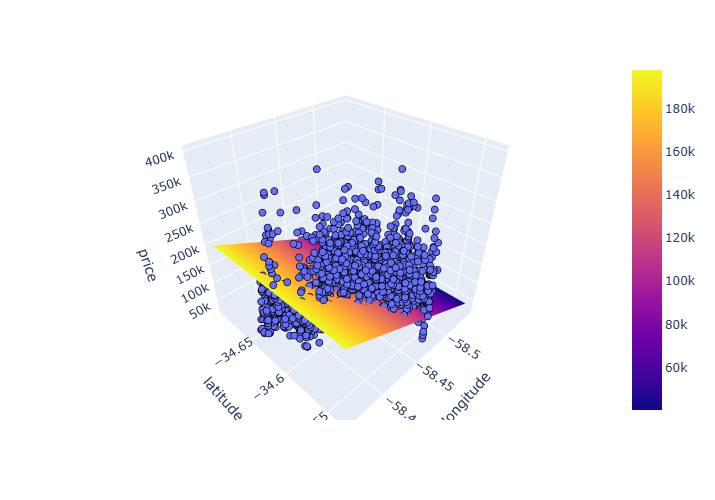

In [102]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="lon",
    y="lat",
    z="price_aprox_usd",
    labels={"lon": "longitude", "lat": "latitude", "price_aprox_usd": "price"},
    width=600,
    height=500,
)

# Create x and y coordinates for model representation
x_plane = np.linspace(df["lon"].min(), df["lon"].max(), 10)
y_plane = np.linspace(df["lat"].min(), df["lat"].max(), 10)
xx, yy = np.meshgrid(x_plane, y_plane)

# Use model to predict z coordinates
z_plane = model.predict(pd.DataFrame({"lon": x_plane, "lat": y_plane}))
zz = np.tile(z_plane, (10, 1))

# Add plane to figure
fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()